In [2]:
import os

import tqdm
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
DATA_ROOT = "../../raw/frog"
FROG_H5 = os.path.join(DATA_ROOT, "frog_11-36_12-43_train_val.h5")
FROG_ODOM1 = os.path.join(DATA_ROOT, "frog_11-36_odom.npz")
FROM_ODOM2 = os.path.join(DATA_ROOT, "frog_12-43_odom.npz")

In [5]:
hf = h5py.File(FROG_H5, "r")

In [6]:
list(hf.values())

[<HDF5 dataset "circle_idx": shape (120396,), type "<u4">,
 <HDF5 dataset "circle_num": shape (120396,), type "<u4">,
 <HDF5 dataset "circles": shape (473005, 6), type "<f4">,
 <HDF5 dataset "scans": shape (120396, 720), type "<f4">,
 <HDF5 dataset "split": shape (120396,), type "|u1">,
 <HDF5 dataset "timestamps": shape (120396,), type "<f8">]

In [7]:
scans = hf["scans"]
circle_idx = hf["circle_idx"]
circle_num = hf["circle_num"]
circles = hf["circles"]

In [8]:
scans[0].tolist()

[1.309999942779541,
 1.3179999589920044,
 1.319000005722046,
 1.3250000476837158,
 1.3250000476837158,
 1.319000005722046,
 1.3200000524520874,
 1.3200000524520874,
 1.319000005722046,
 1.3200000524520874,
 1.3200000524520874,
 1.319000005722046,
 1.312999963760376,
 1.312999963760376,
 1.312000036239624,
 1.312000036239624,
 1.315000057220459,
 1.3200000524520874,
 1.3200000524520874,
 1.3200000524520874,
 1.3220000267028809,
 1.3250000476837158,
 1.3250000476837158,
 1.3320000171661377,
 1.3320000171661377,
 1.3320000171661377,
 1.3270000219345093,
 1.3140000104904175,
 1.3140000104904175,
 1.3140000104904175,
 1.3329999446868896,
 1.340000033378601,
 1.340000033378601,
 1.340000033378601,
 1.3289999961853027,
 1.3250000476837158,
 1.3250000476837158,
 1.3250000476837158,
 1.3259999752044678,
 1.3309999704360962,
 1.3309999704360962,
 1.3289999961853027,
 1.3309999704360962,
 1.3309999704360962,
 1.3450000286102295,
 1.3450000286102295,
 1.3450000286102295,
 1.3339999914169312,
 1.33

[[ 6.524585    4.5060797   0.4         7.9293733   0.6044103   0.05040263]
 [ 5.709624   -0.78813535  0.4         5.763763   -0.13716947  0.06928802]
 [ 4.1069365  -0.9943618   0.4         4.2255983  -0.23754634  0.09437992]]


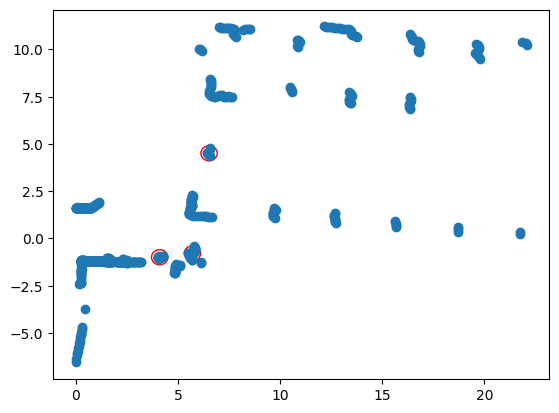

In [9]:
idx = 1000
x = scans[idx] * np.cos(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))
y = scans[idx] * np.sin(np.linspace(-0.5 * np.pi, 0.5 * np.pi, scans.shape[1]))

idx = circle_idx[idx]
num = circle_num[idx]

cs = circles[idx:idx+num, :]
print(cs)

fig, ax = plt.subplots()
for i in range(cs.shape[0]):
    cx, cy, cr, _, _, _ = cs[i]
    ax.add_patch(plt.Circle((cx, cy), cr, fill=False, color='r'))
plt.plot(x, y, 'o')
plt.show()

In [10]:
odom1 = np.load(FROG_ODOM1)

In [13]:
odom1

NpzFile '../../raw/frog/frog_11-36_odom.npz' with keys: ts, data

In [17]:
odom1["data"].shape

(17746, 3)

In [18]:
odom1["data"][0]

array([0., 0., 0.], dtype=float32)

In [19]:
odom1["data"]

array([[  0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ],
       ...,
       [ 91.217    , -23.603    ,  -1.0995574],
       [ 91.217    , -23.603    ,  -1.0995574],
       [ 91.217    , -23.603    ,  -1.0995574]], dtype=float32)

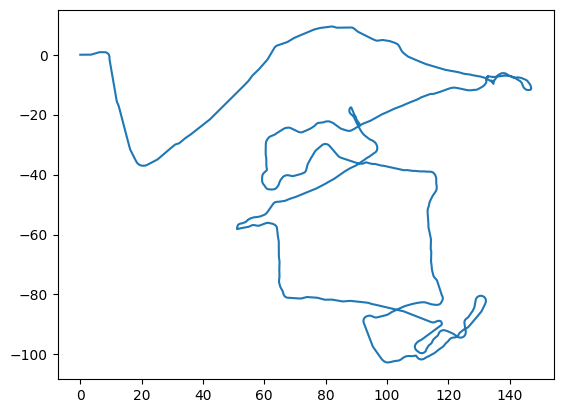

In [20]:
# Plot the trajectory
fig, ax = plt.subplots()
ax.plot(odom1["data"][:, 0], odom1["data"][:, 1])
plt.show()
